# Capítulo 4

## Regresión lineal

$$ \hat{y} = \theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$$

Para predecir un valor computamos la siguiente ecuación.

$$ \hat{y}=h_\theta(\bf{x}) = \mathbf {\theta}\cdot{x} $$

El ajuste se hace reduciendo el *Mean Square Error* o MSE dado por,

$$ MSE(\mathbf {X},h_\mathbf {\theta}) = \frac{1}{m}\sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} \Big( \mathbf {\theta^T}\bf{x^{(i)}- y^{(i)}}  \Big)^2$$

Para encontar el valor de $\mathbf{\theta}$ que minimice la ecuacion de costo se utiliza una ecuación llamada *Normal Equation* dada por,

$$ \mathbf{\hat{\theta}} = \big( \mathbf{X^T\mathbf{X}} \big)^{-1} \mathbf{X^T}\mathbf{y}$$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
X = 2*np.random.rand(100,1)
y = 3 + 2*X + np.random.randn(100,1)

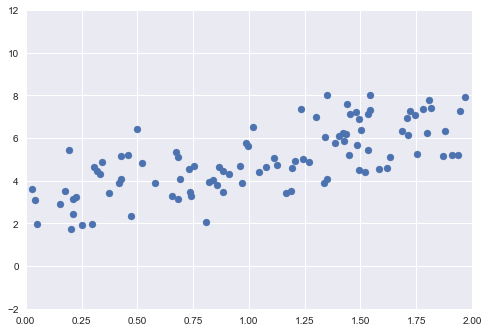

In [15]:
plt.style.use("seaborn")
fig, ax = plt.subplots()

ax.set_xlim(0,2.)
ax.set_ylim(-2,12)
ax.scatter(X,y)
plt.show()

Ahora vamos a aplicar resolver la *normal equiation*.

In [22]:
X_b = np.c_[np.ones((100,1)),X]
theta_hat = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [23]:
theta_hat

array([[2.8892629 ],
       [2.00062946]])

Los valores hayados se acercan bastante los valores iniciales de la recta usada para generar los puntos, podemos ver que $\theta_0 = 2.9$ y $\theta_1 = 2.0$.

Ahora podemos usar este $\hat\theta$ para predecir valores.

In [29]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_pred = X_new_b.dot(theta_hat)
y_pred

array([[2.8892629 ],
       [6.89052182]])

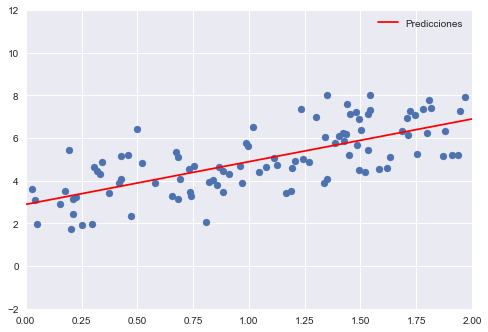

In [37]:
fig, ax = plt.subplots()

ax.plot(X_new, y_pred, "r-", label = "Predicciones")
ax.scatter(X,y)
plt.axis([0,2,-2,12])

plt.legend()
plt.show()

Ahora vamos a implementar un regresor lineal pero usando Scikit Learn.

In [38]:
from sklearn.linear_model import LinearRegression

In [40]:
lr = LinearRegression()
lr.fit(X,y)
lr.intercept_, lr.coef_

(array([2.8892629]), array([[2.00062946]]))

In [41]:
lr.predict(X_new)

array([[2.8892629 ],
       [6.89052182]])

La clase *LinearREgression* esta basada en la función *scipy.linalg.lstsq()*, que hace referencia a "*least squares*", la cual puede ser llamada directamente.

In [43]:
theta_hat2, residuo, rango, s = np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_hat2

array([[2.8892629 ],
       [2.00062946]])

La función *scipy.linalg.lstsq()* computa $\mathbf{\hat\theta} = \mathbf{X}^{+}\mathbf{y}$ donde $\mathbf{X}^+$ es ka matríz *pseudoinversa* de $\mathbf{X}$. Éste método es más eficiente y además dicha matriz siempre esta definida, mientras que para la *normal equiation* podríamos no tener solución.